In [2]:
import pandas as pd
import networkx as nx
from itertools import combinations

In [12]:
df = pd.read_csv("/home/ada/Documents/DTA/Thesis/Data/Clustered_final/Processed/Processed_Bridgerton.csv")
df['Speaker'] = df['Speaker'].astype(str)
df['Speaker'] = df['Speaker'].apply(lambda x: "SPEAKER_" + x if len(x) == 2 else "SPEAKER_0" + x)

In [13]:
# Selecting only second season due to character changes
df = df.loc[6087:]
df

,Cumulative_shifted,Episode_order,Season,Episode,Correct_start,Correct_stop,Speaker
6087,33679.0,201,2,1,10.562187,12.705313,SPEAKER_16
6088,33679.0,201,2,1,32.027188,36.380937,SPEAKER_23
6089,33679.0,201,2,1,36.448438,36.937813,SPEAKER_23
6090,33679.0,201,2,1,36.937813,42.995938,SPEAKER_00
6091,33679.0,201,2,1,39.080938,39.722188,SPEAKER_23
...,...,...,...,...,...,...,...
12469,22657.5,208,2,8,4145.948438,4150.994063,SPEAKER_00
12470,22657.5,208,2,8,4150.994063,4152.074063,SPEAKER_04
12471,22657.5,208,2,8,4160.528438,4161.996563,SPEAKER_00
12472,22657.5,208,2,8,4161.996563,4163.582813,SPEAKER_04


In [14]:
def name_all(df):
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_00", "Colin/Music")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_01", "Lady_Danbury")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_02", "Genevieve")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_03", "Anthony")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_04", "Music")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_05", "Daphne")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_06", "")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_07", "Portia")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_08", "Kate")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_09", "")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_10", "Violet_Bridgerton")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_11", "Lady_Cowper/Cressida/Mary_Sharma")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_12", "Edwina")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_13", "Narrator")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_14", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_15", "")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_16", "Daphne")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_17", "Simon")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_18", "Benedict")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_19", "Penelope")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_20", "")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_21", "Marina")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_22", "Anthony")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_23", "emotional_utterances")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_24", "Eloise")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_25", "Jack")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_26", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_27", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_28", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_29", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_30", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_31", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_32", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_33", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_34", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_35", "")
  return df



df2 = name_all(df)
speaker_list = df2['Speaker'].tolist()

In [15]:
G = nx.Graph()

si, ei = 0, 2 #start index, end index
while ei < len(speaker_list):
    interaction = []
    for character in set(speaker_list[si : ei]):
        if ' ' in character:
            interaction.extend(character.split())
        else:
            interaction.append(character)
    interaction = set(interaction)
    if len(interaction) > 1:
        for sp1, sp2 in combinations(interaction, 2):
            if G.has_edge(sp1, sp2):
                G[sp1][sp2]['weight'] += 1
            else:
                G.add_edge(sp1, sp2, weight=1)
    si += 1
    ei += 1

In [16]:
print(G.nodes)
print(f"# nodes = {G.number_of_nodes()}, # edges = {G.number_of_edges()}")
nx.write_gexf(G, '/home/ada/Documents/DTA/Thesis/Data/Networks/Bridgerton.gexf')
print('# interactions:', G.size(weight='weight'))

['emotional_utterances', 'Daphne', 'Colin/Music', 'Eloise', 'SPEAKER_15', 'Lady_Danbury', 'Lady_Cowper/Cressida/Mary_Sharma', 'Penelope', 'SPEAKER_06', 'Portia', 'Simon', 'Violet_Bridgerton', 'Anthony', 'Benedict', 'SPEAKER_20', 'Jack', 'Music', 'Narrator', 'Genevieve', 'SPEAKER_09', 'Kate', 'SPEAKER_14', 'Edwina', 'Marina']
# nodes = 24, # edges = 238
# interactions: 3336.0


In [17]:
from copy import deepcopy

print('Before:')
print(f"# nodes = {G.number_of_nodes()}, # edges = {G.number_of_edges()}")
print('# interactions:', G.size(weight='weight'))


Before:
# nodes = 24, # edges = 238
# interactions: 3336.0


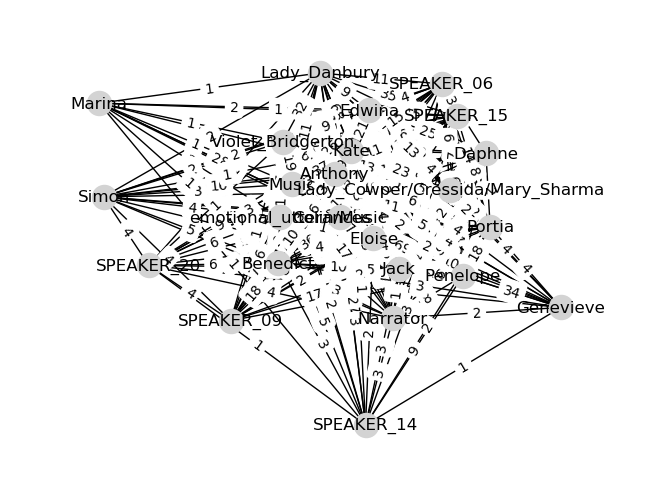

In [18]:
import matplotlib.pyplot as plt
from matplotlib.figure import _AxesStack

pos = nx.spring_layout(G, scale=2)
nx.draw(G, pos, node_color='lightgrey')
nx.draw_networkx_labels(G, pos);
nx.draw_networkx_edge_labels(G, pos, nx.get_edge_attributes(G, 'weight'));

# take care of margins
plot_margin = 0.25
x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin, x1 + plot_margin,
          y0 - plot_margin, y1 + plot_margin))
plt.axis('off');

In [19]:
nx.to_pandas_edgelist(G)

,source,target,weight
0,emotional_utterances,Daphne,9
1,emotional_utterances,Colin/Music,52
2,emotional_utterances,Eloise,15
3,emotional_utterances,SPEAKER_15,10
4,emotional_utterances,Lady_Cowper/Cressida/Mary_Sharma,7
...,...,...,...
233,SPEAKER_09,Edwina,3
234,Kate,SPEAKER_14,1
235,Kate,Edwina,121
236,SPEAKER_14,Marina,1


In [20]:
unweighted = G.degree()
weighted = G.degree(weight='weight')
bcent = nx.betweenness_centrality(G)
bcent

print(weighted)
print(unweighted)

[('emotional_utterances', 388), ('Daphne', 167), ('Colin/Music', 748), ('Eloise', 364), ('SPEAKER_15', 158), ('Lady_Danbury', 238), ('Lady_Cowper/Cressida/Mary_Sharma', 254), ('Penelope', 298), ('SPEAKER_06', 130), ('Portia', 274), ('Simon', 66), ('Violet_Bridgerton', 294), ('Anthony', 704), ('Benedict', 284), ('SPEAKER_20', 78), ('Jack', 264), ('Music', 585), ('Narrator', 112), ('Genevieve', 90), ('SPEAKER_09', 110), ('Kate', 626), ('SPEAKER_14', 42), ('Edwina', 352), ('Marina', 46)]
[('emotional_utterances', 23), ('Daphne', 18), ('Colin/Music', 23), ('Eloise', 21), ('SPEAKER_15', 18), ('Lady_Danbury', 21), ('Lady_Cowper/Cressida/Mary_Sharma', 22), ('Penelope', 20), ('SPEAKER_06', 20), ('Portia', 22), ('Simon', 17), ('Violet_Bridgerton', 22), ('Anthony', 22), ('Benedict', 23), ('SPEAKER_20', 17), ('Jack', 20), ('Music', 23), ('Narrator', 21), ('Genevieve', 15), ('SPEAKER_09', 18), ('Kate', 21), ('SPEAKER_14', 16), ('Edwina', 21), ('Marina', 12)]


In [21]:
pairs = dict(nx.all_pairs_shortest_path_length(G))
pairs

{'emotional_utterances': {'emotional_utterances': 0,
  'Eloise': 1,
  'SPEAKER_20': 1,
  'Daphne': 1,
  'Simon': 1,
  'Lady_Danbury': 1,
  'Edwina': 1,
  'SPEAKER_15': 1,
  'SPEAKER_06': 1,
  'Portia': 1,
  'Kate': 1,
  'SPEAKER_14': 1,
  'Penelope': 1,
  'Anthony': 1,
  'Lady_Cowper/Cressida/Mary_Sharma': 1,
  'Jack': 1,
  'SPEAKER_09': 1,
  'Narrator': 1,
  'Music': 1,
  'Violet_Bridgerton': 1,
  'Colin/Music': 1,
  'Marina': 1,
  'Genevieve': 1,
  'Benedict': 1},
 'Daphne': {'Daphne': 0,
  'Eloise': 1,
  'Benedict': 1,
  'Music': 1,
  'Lady_Danbury': 1,
  'Edwina': 1,
  'Penelope': 1,
  'Anthony': 1,
  'Violet_Bridgerton': 1,
  'Colin/Music': 1,
  'Lady_Cowper/Cressida/Mary_Sharma': 1,
  'SPEAKER_06': 1,
  'Portia': 1,
  'Jack': 1,
  'SPEAKER_09': 1,
  'Simon': 1,
  'emotional_utterances': 1,
  'Kate': 1,
  'Narrator': 1,
  'SPEAKER_20': 2,
  'SPEAKER_15': 2,
  'SPEAKER_14': 2,
  'Marina': 2,
  'Genevieve': 2},
 'Colin/Music': {'Colin/Music': 0,
  'Eloise': 1,
  'SPEAKER_20': 1,
  '

In [22]:
import pandas as pd
data = []
for c in sorted(pairs.keys()):
    data.append([pairs[c][d] for d in sorted(pairs.keys())])
pd.DataFrame(data, index=sorted(pairs.keys()), columns=sorted(pairs.keys()))

,Anthony,Benedict,Colin/Music,Daphne,Edwina,Eloise,Genevieve,Jack,Kate,Lady_Cowper/Cressida/Mary_Sharma,...,Penelope,Portia,SPEAKER_06,SPEAKER_09,SPEAKER_14,SPEAKER_15,SPEAKER_20,Simon,Violet_Bridgerton,emotional_utterances
Anthony,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Benedict,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Colin/Music,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Daphne,1,1,1,0,1,1,2,1,1,1,...,1,1,1,1,2,2,2,1,1,1
Edwina,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,2,1,2,1,1,1
Eloise,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,2,2,1,1
Genevieve,1,1,1,2,1,1,0,2,1,1,...,1,1,2,2,1,2,1,2,1,1
Jack,1,1,1,1,1,1,2,0,1,1,...,1,1,1,1,1,1,1,1,2,1
Kate,1,1,1,1,1,1,1,1,0,1,...,2,1,1,1,1,1,1,1,1,1
Lady_Cowper/Cressida/Mary_Sharma,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,2,1,1,1


In [23]:
weighted = nx.betweenness_centrality(G)

data = [(c, weighted[c]) for c in G.nodes()]
pd.DataFrame(data, columns=('character', 'betweenness centrality'))

,character,betweenness centrality
0,emotional_utterances,0.011483
1,Daphne,0.001136
2,Colin/Music,0.011483
3,Eloise,0.007790
4,SPEAKER_15,0.003956
5,Lady_Danbury,0.007011
6,Lady_Cowper/Cressida/Mary_Sharma,0.009716
7,Penelope,0.007222
8,SPEAKER_06,0.003166
9,Portia,0.007243
